# How to really make profit from arbitrage opportunities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
symbol = "ADABTC"
exchange1 = "binance"
exchange2 = "bittrex"

symbol = "LTCBTC"
exchange1 = "bittrex"
exchange2 = "binance"

In [185]:
def load_csv(symbol, exchange):
    return pd.read_csv("data/"+symbol+"_"+exchange+".csv", parse_dates=True, sep = ";", header = None, names=["date", "bid", "ask"], index_col=0)

In [176]:
pair1 = load_csv(symbol, exchange1)
pair2 = load_csv(symbol, exchange2)
pair1.head()

,bid,ask
date,,
2018-02-12 20:51:51.374639,0.018210,0.018325
2018-02-12 20:52:49.143429,0.018216,0.018323
2018-02-12 20:53:57.796482,0.018221,0.018306
2018-02-12 20:54:57.986109,0.018221,0.018300
2018-02-12 20:56:06.490455,0.018222,0.018300


In [177]:
pair1 = pair1.resample("min").mean().ffill()
pair2 = pair2.resample("min").mean().ffill()
pair1.tail()

,bid,ask
date,,
2018-03-02 19:37:00,0.018820,0.01882
2018-03-02 19:38:00,0.018820,0.01882
2018-03-02 19:39:00,0.018807,0.01882
2018-03-02 19:40:00,0.018812,0.01882
2018-03-02 19:41:00,0.018812,0.01882


In [178]:
pair1.tail()

,bid,ask
date,,
2018-03-02 19:37:00,0.018820,0.01882
2018-03-02 19:38:00,0.018820,0.01882
2018-03-02 19:39:00,0.018807,0.01882
2018-03-02 19:40:00,0.018812,0.01882
2018-03-02 19:41:00,0.018812,0.01882


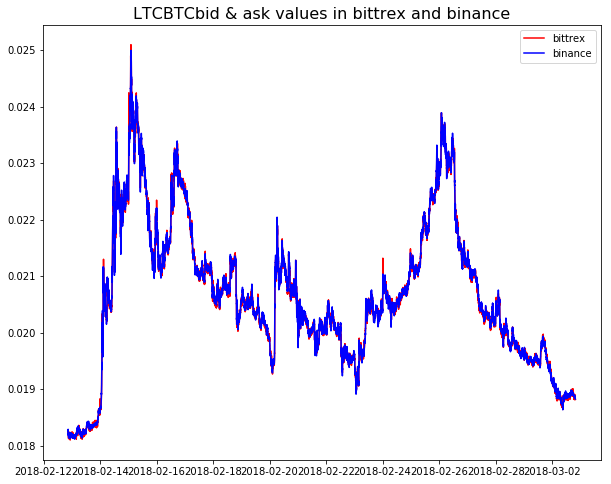

In [179]:
plt.figure(num=1, figsize=(10,8))
plt.title(symbol +"bid & ask values in "+exchange1+" and "+exchange2, fontsize=16)
plt.plot((pair1["bid"]+pair1["ask"])/2, label=exchange1, color="red")
plt.plot((pair2["bid"]+pair2["ask"])/2, label=exchange2, color="blue")
plt.legend()
plt.show()

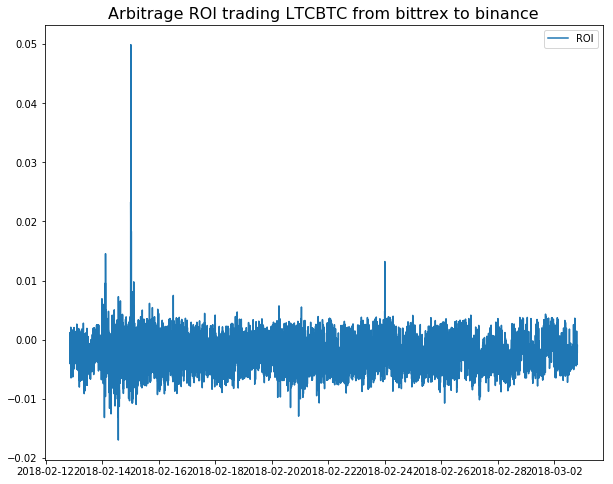

In [180]:
plt.figure(num=1, figsize=(10,8))
plt.title("Arbitrage ROI trading "+symbol+" from "+exchange1+" to "+exchange2, fontsize=16)
plt.plot((pair1["bid"]-pair2["ask"])/pair2["ask"], label="ROI")
plt.legend()
plt.show()

In [186]:
pair1_fee = 0.25/100
pair2_fee = 0.05/100

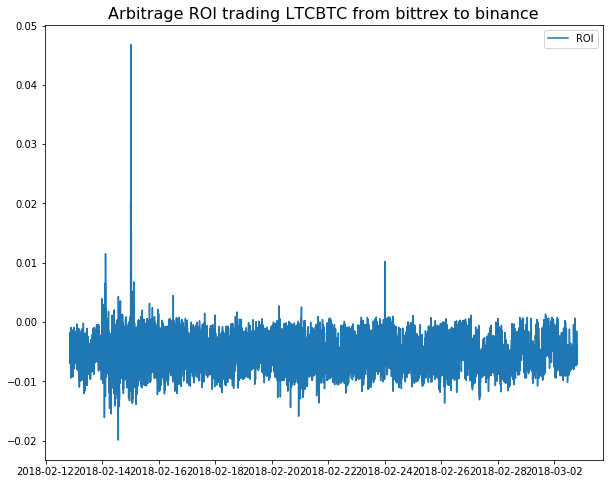

In [187]:
plt.figure(num=1, figsize=(10,8))
plt.title("Arbitrage ROI trading "+symbol+" from "+exchange1+" to "+exchange2, fontsize=16)
diff = pair1["bid"]*(1-pair1_fee)-pair2["ask"]*(1+pair2_fee)
plt.plot(diff/pair2["ask"], label="ROI")
plt.legend()
plt.show()

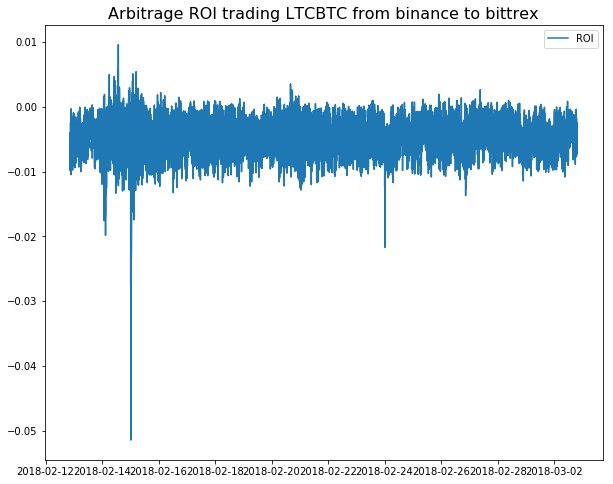

In [189]:
plt.figure(num=1, figsize=(10,8))
plt.title("Arbitrage ROI trading "+symbol+" from "+exchange2+" to "+exchange1, fontsize=16)
diff = pair2["bid"]*(1-pair2_fee)-pair1["ask"]*(1+pair1_fee)
plt.plot(diff/pair1["ask"], label="ROI")
plt.legend()
plt.show()

In [192]:
print(pair1.index)

DatetimeIndex(['2018-02-12 20:51:00', '2018-02-12 20:52:00',
               '2018-02-12 20:53:00', '2018-02-12 20:54:00',
               '2018-02-12 20:55:00', '2018-02-12 20:56:00',
               '2018-02-12 20:57:00', '2018-02-12 20:58:00',
               '2018-02-12 20:59:00', '2018-02-12 21:00:00',
               ...
               '2018-03-02 19:32:00', '2018-03-02 19:33:00',
               '2018-03-02 19:34:00', '2018-03-02 19:35:00',
               '2018-03-02 19:36:00', '2018-03-02 19:37:00',
               '2018-03-02 19:38:00', '2018-03-02 19:39:00',
               '2018-03-02 19:40:00', '2018-03-02 19:41:00'],
              dtype='datetime64[ns]', name='date', length=25851, freq='T')


In [193]:
print(pair2.index)

DatetimeIndex(['2018-02-12 20:51:00', '2018-02-12 20:52:00',
               '2018-02-12 20:53:00', '2018-02-12 20:54:00',
               '2018-02-12 20:55:00', '2018-02-12 20:56:00',
               '2018-02-12 20:57:00', '2018-02-12 20:58:00',
               '2018-02-12 20:59:00', '2018-02-12 21:00:00',
               ...
               '2018-03-02 19:32:00', '2018-03-02 19:33:00',
               '2018-03-02 19:34:00', '2018-03-02 19:35:00',
               '2018-03-02 19:36:00', '2018-03-02 19:37:00',
               '2018-03-02 19:38:00', '2018-03-02 19:39:00',
               '2018-03-02 19:40:00', '2018-03-02 19:41:00'],
              dtype='datetime64[ns]', name='date', length=25851, freq='T')


In [218]:
def estimate_roi(ask, bid):
    fee = 0.25/100
    return (bid*(1-fee)-ask*(1+fee)) / ask

In [232]:
long_exchange1 = False
long_exchange2 = False
min_percent_profit = 0.3/100
acumulated_profit = 0

for t in pair1.index:
    
    if not long_exchange1 and not long_exchange2:
        
        # Evaluate long pair1 and short pair2
        roi_1_to_2 = estimate_roi(pair1.loc[t]["ask"], pair2.loc[t]["bid"])
        
        if roi_1_to_2 > min_percent_profit:
            long_exchange1 = True
            long_price = pair1.loc[t]["ask"]
            short_price = pair2.loc[t]["bid"]            
            print(t, "Opening")
            print("Buy in", exchange1, "at %.8f"%pair1.loc[t]["ask"])
            print("Sell in", exchange2, "at %.8f"%pair2.loc[t]["bid"])
            print("Estimated ROI: %.4f"%roi_1_to_2)
            
        else:
            
            # Evaluate long pair2 and short pair1
            roi_2_to_1 = estimate_roi(pair2.loc[t]["ask"], pair1.loc[t]["bid"])
            
            if roi_2_to_1 > min_percent_profit:
                long_exchange2 = True
                long_price = pair2.loc[t]["ask"]
                short_price = pair1.loc[t]["bid"]
                print(t, "Opening")
                print("Buy in", exchange2, "at %.8f"%pair2.loc[t]["ask"])
                print("Sell in", exchange1, "at %.8f"%pair1.loc[t]["bid"])
                print("Estimated ROI: %.4f"%roi_2_to_1)
                
    elif long_exchange1:
        
        # Evaluate close: short pair1 and long pair2
        if pair1.loc[t]["bid"]>pair2.loc[t]["ask"]:
            long_exchange1 = False
            btc_profit = (pair1.loc[t]["bid"] - long_price) + (short_price - pair2.loc[t]["ask"])
            acumulated_profit += btc_profit
            print(t, "Closing")
            print("Sell in", exchange1, "at %.8f"%pair1.loc[t]["bid"])
            print("Buy in", exchange2, "at %.8f"%pair2.loc[t]["ask"])
            print("Profit: %.8f"%(btc_profit)+" BTC")
            
            
    elif long_exchange2:
        
        # Evaluate close: short pair2 and long pair1
        if pair2.loc[t]["bid"]>pair1.loc[t]["ask"]:
            long_exchange2 = False
            btc_profit = (pair2.loc[t]["bid"] - long_price) + (short_price - pair1.loc[t]["ask"])
            acumulated_profit += btc_profit
            print(t, "Closing")
            print("Sell in", exchange2, "at %.8f"%pair2.loc[t]["bid"])
            print("Buy in", exchange1, "at %.8f"%pair1.loc[t]["ask"])
            print("Profit: %.8f"%(btc_profit)+" BTC")

print("Acumulated proifit: %.8f"%acumulated_profit)

2018-02-14 02:49:00 Opening
Buy in binance at 0.02079939
Sell in bittrex at 0.02099901
Estimated ROI: 0.0046
2018-02-14 02:54:00 Closing
Sell in binance at 0.02090500
Buy in bittrex at 0.02087857
Profit: 0.00022605 BTC
2018-02-14 02:58:00 Opening
Buy in binance at 0.02099293
Sell in bittrex at 0.02129846
Estimated ROI: 0.0095
2018-02-14 03:22:00 Closing
Sell in binance at 0.02075200
Buy in bittrex at 0.02074926
Profit: 0.00030827 BTC
2018-02-14 13:41:00 Opening
Buy in bittrex at 0.02277919
Sell in binance at 0.02296700
Estimated ROI: 0.0032
2018-02-14 13:53:00 Closing
Sell in bittrex at 0.02361990
Buy in binance at 0.02344900
Profit: 0.00035871 BTC
2018-02-15 00:19:00 Opening
Buy in binance at 0.02276253
Sell in bittrex at 0.02300355
Estimated ROI: 0.0056
2018-02-15 01:00:00 Closing
Sell in binance at 0.02357800
Buy in bittrex at 0.02357639
Profit: 0.00024263 BTC
2018-02-15 02:03:00 Opening
Buy in binance at 0.02469990
Sell in bittrex at 0.02489901
Estimated ROI: 0.0030
2018-02-15 02:0